In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

df_train = pd.read_csv('/content/NSL_KDD_Train.csv', sep=",", names=df_columns)
df_train = df_train.iloc[:,:-1]
df_test = pd.read_csv('/content/NSL_KDD_Test.csv', sep=",", names=df_columns)
df_test = df_test.iloc[:,:-1]

In [3]:
df_data = pd.concat([df_train, df_test])
df_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  

In [5]:
df_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [7]:
df_data['attack_class'] = df_data['attack'].apply(lambda v: mapping[v])


In [8]:
df_data.drop(['attack'], axis=1, inplace=True)


In [9]:
df_data['attack_class'].value_counts()

Normal    77054
DoS       53385
Probe     14077
R2L        3749
U2R         252
Name: attack_class, dtype: int64

In [10]:
attack_protocol = pd.crosstab(df_data.attack_class, df_data.protocol_type)
attack_protocol

protocol_type,icmp,tcp,udp
attack_class,,,
DoS,3553,48926,906
Normal,1402,61442,14210
Probe,4375,7721,1981
R2L,4,3231,514
U2R,0,249,3


In [11]:
attack_flag = pd.crosstab(df_data.attack_class, df_data.flag)
attack_flag

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
attack_class,,,,,,,,,,,
DoS,0,8432,1590,0,624,36119,3,11,241,6365,0
Normal,11,2727,221,1,190,354,372,127,49,73000,2
Probe,39,3812,449,104,2267,391,5,3,1,6668,338
R2L,0,3,74,0,7,0,6,1,7,3647,4
U2R,0,109,1,0,2,0,0,0,0,140,0


In [12]:
attack_service = pd.crosstab(df_data.attack_class, df_data.service)
attack_service

service,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,...,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
attack_class,,,,,,,,,,,,,,,,,,,,,
DoS,0,0,896,0,747,744,765,567,579,530,...,2124,0,8,581,0,0,816,722,649,710
Normal,196,71,0,0,255,0,0,0,0,0,...,961,4,6,81,10,617,0,0,0,0
Probe,3,7,11,2,16,12,9,12,25,19,...,363,0,0,28,0,4,14,13,11,23
R2L,1,10,0,0,4,0,0,0,0,0,...,457,0,0,0,0,4,0,0,0,0
U2R,0,0,0,0,0,0,0,0,0,0,...,74,0,0,0,0,0,0,0,0,0


In [13]:
df_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
df_data.duplicated().sum()

629

In [15]:
df_data= df_data.dropna(axis=0);
df_data = df_data.drop_duplicates()

In [16]:
df_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [17]:
def encode_categorical(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])
    return df

df_data = encode_categorical(df_data)

In [18]:
df_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


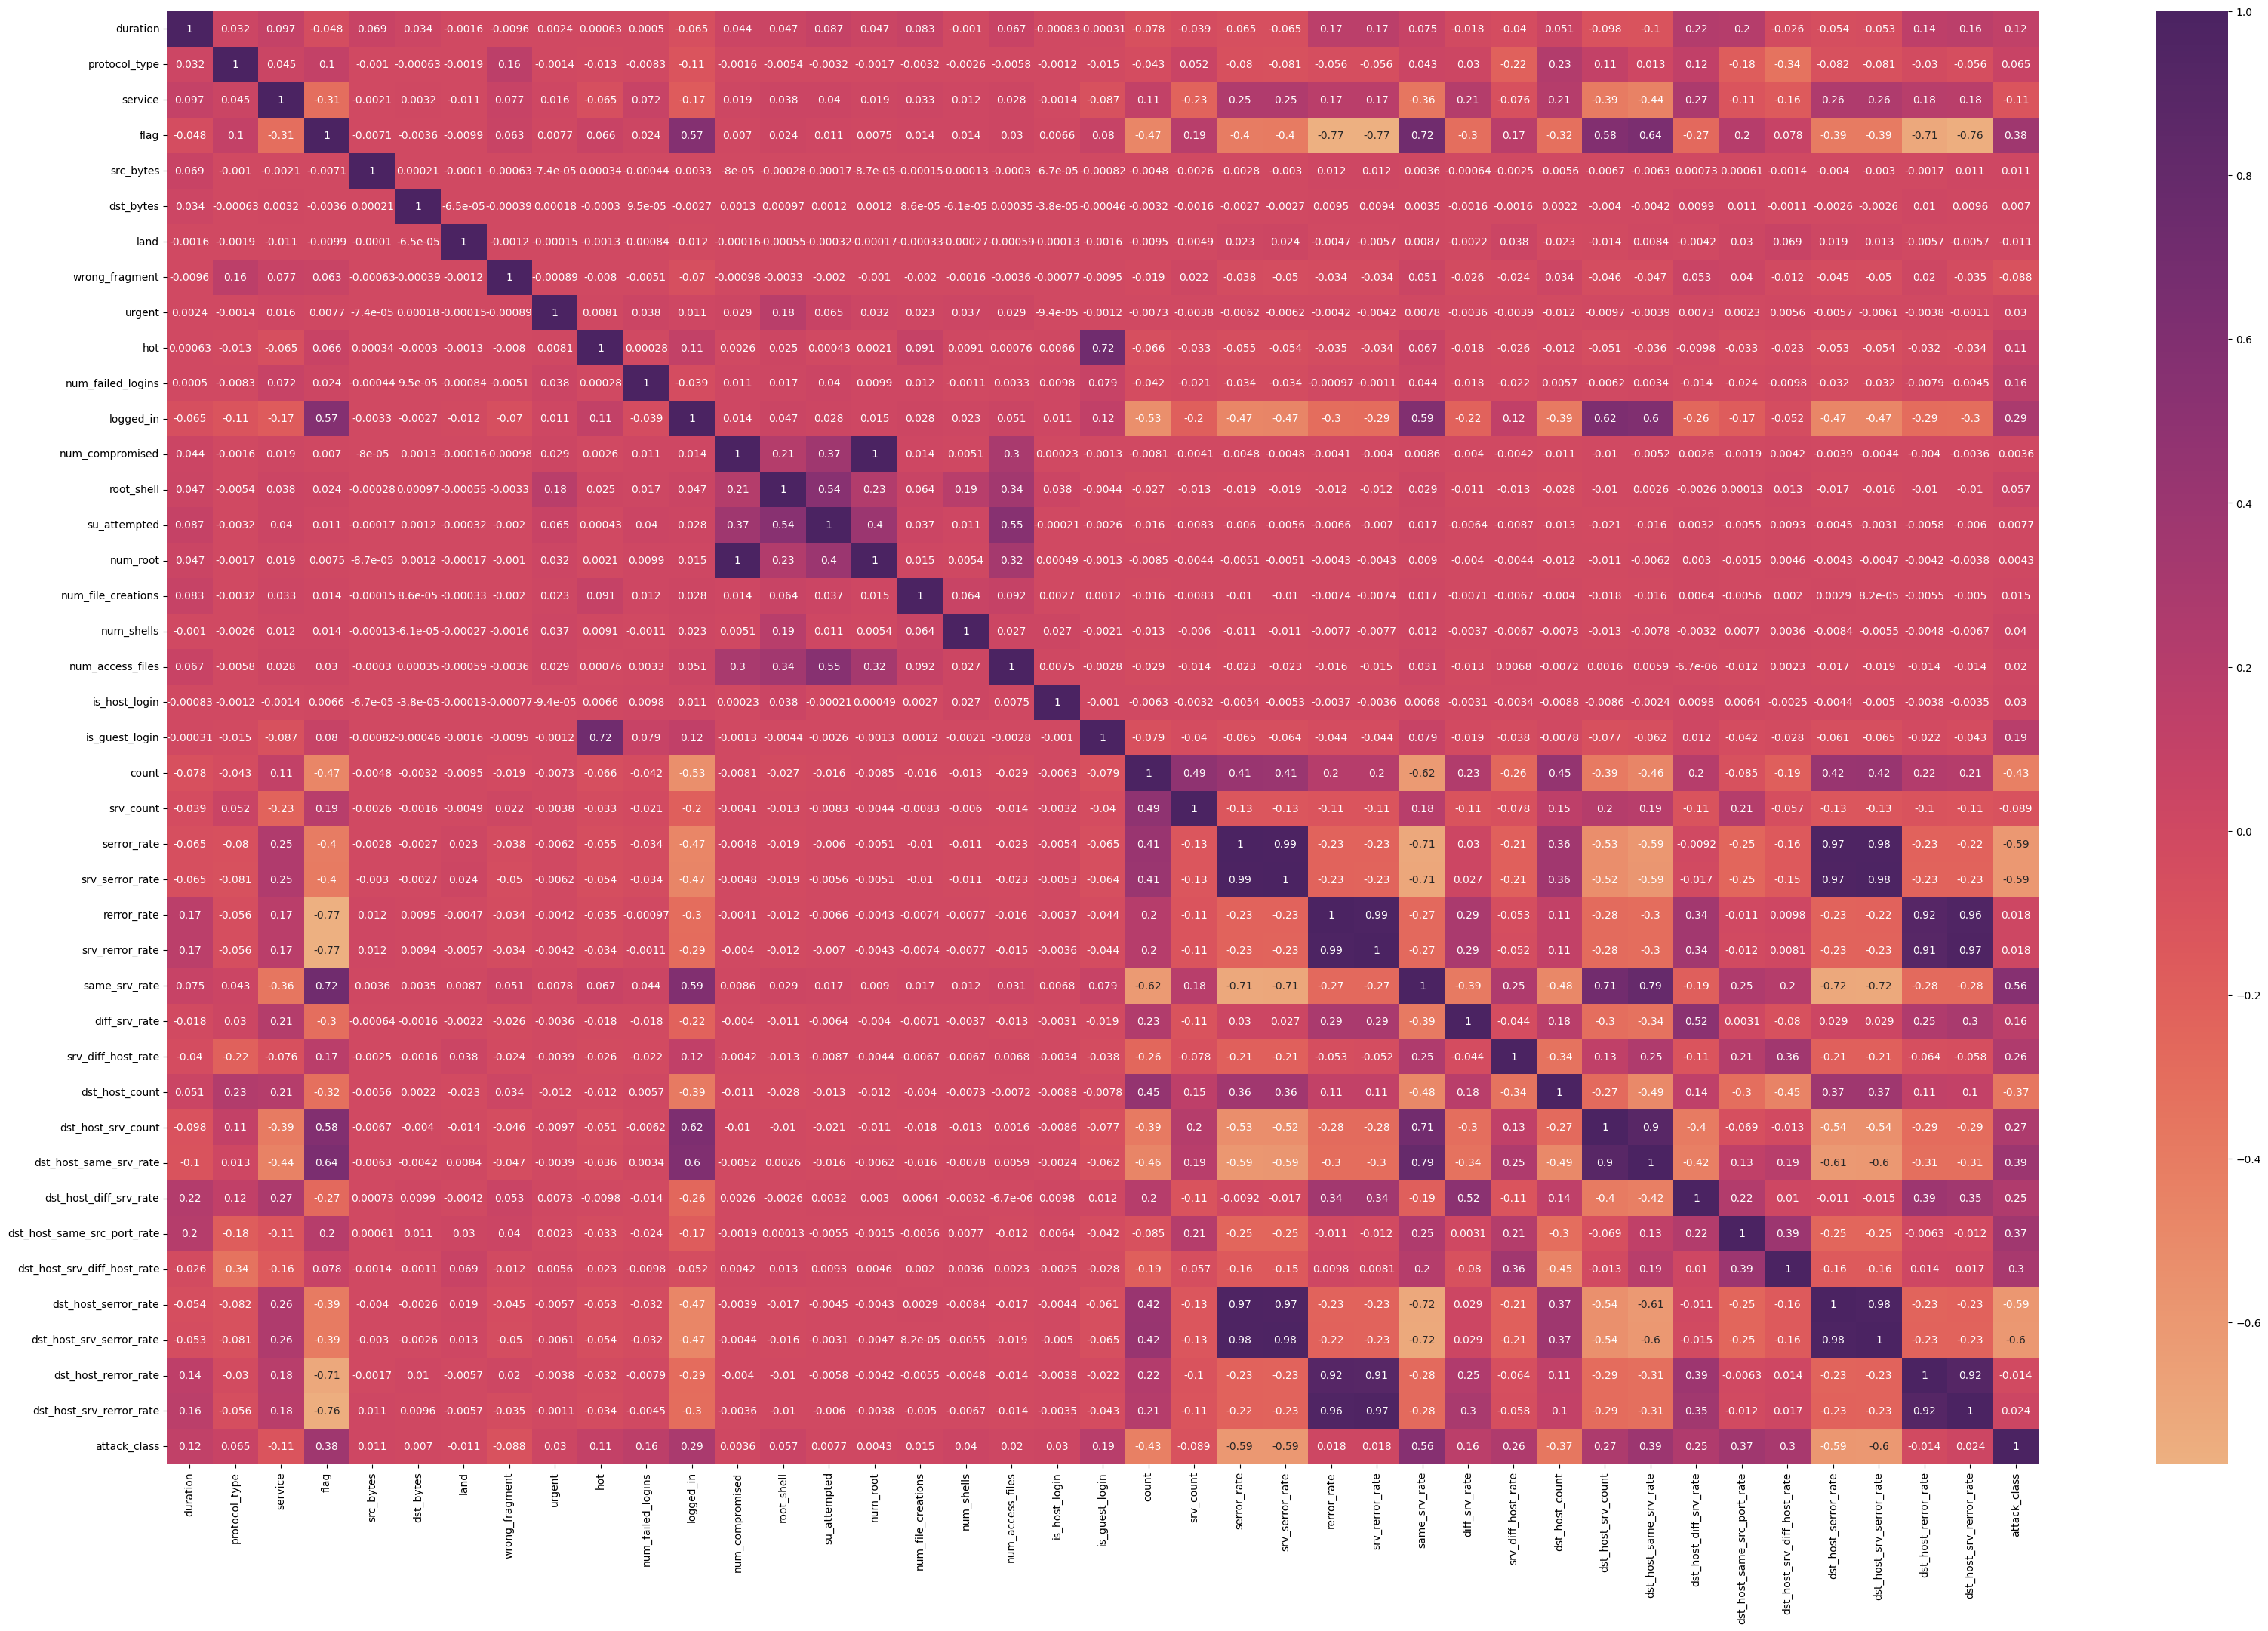

In [19]:
plt.figure(figsize=(40,25))
sns.heatmap(df_data.corr(),annot= True,cmap = 'flare')
plt.show()

In [20]:
corr_matrix = df_data.corr().abs()
corr_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,0.009528,0.064218,0.042679,...,0.050570,0.109776,0.116005,0.254195,0.228737,0.026669,0.064948,0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,0.000208,0.003353,0.000086,...,0.005791,0.006861,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,0.000504,0.002894,0.001233,...,0.002528,0.004224,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223
land,0.001553,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,0.000381,0.011402,0.000164,...,0.025499,0.014159,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303
wrong_fragment,0.009866,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,0.002418,0.072418,0.001044,...,0.041056,0.045240,0.048733,0.059797,0.037177,0.016252,0.051917,0.055917,0.028890,0.033682
urgent,0.003830,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,0.006941,0.007897,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912
hot,0.000705,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,0.012249,0.051864,0.036293,0.012293,0.034536,0.024715,0.058222,0.058214,0.030555,0.031670
num_failed_logins,0.009528,0.000208,0.000504,0.000381,0.002418,0.097507,0.003715,1.000000,0.006439,0.019085,...,0.025476,0.023053,0.001576,0.001945,0.005526,0.003302,0.011648,0.012299,0.018660,0.017359
logged_in,0.064218,0.003353,0.002894,0.011402,0.072418,0.007299,0.116435,0.006439,1.000000,0.014413,...,0.401084,0.624365,0.604058,0.256065,0.160994,0.055953,0.491478,0.493264,0.275972,0.272806
num_compromised,0.042679,0.000086,0.001233,0.000164,0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,0.010928,0.010321,0.004995,0.002981,0.002045,0.004252,0.004377,0.004898,0.003647,0.003219


In [21]:
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper = corr_matrix.where(mask)
#correlations greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [22]:
df_data.drop(to_drop, axis=1, inplace=True)

In [23]:
df_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,attack_class
0,0,1,20,9,491,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.05,1
1,0,2,44,9,146,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.00,1
4,0,1,24,9,199,420,0,0,0,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,1


In [24]:
X = df_data.drop(columns = ['attack_class'])
y = df_data['attack_class'].values


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Accuracy' : accuracy}

Recall:  0.9940496314828589
Precision:  0.9940813404404255
Accuracy:  0.9940496314828589


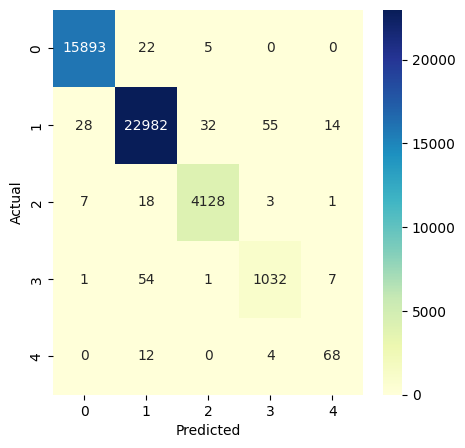

{'Accuracy': 0.9940496314828589}

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=11)
model_evaluation(dt)

Recall:  0.9880992629657178
Precision:  0.9880203884757389
Accuracy:  0.9880992629657178


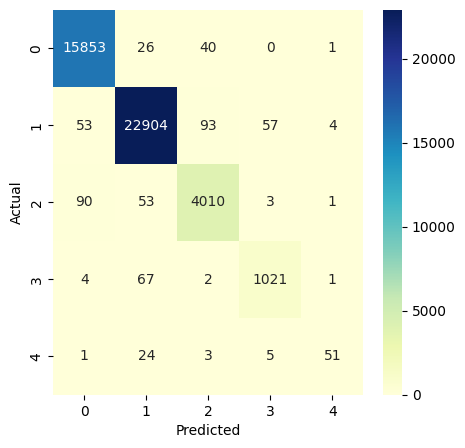

{'Accuracy': 0.9880992629657178}

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
model_evaluation(knn)

Recall:  0.9954696057880857
Precision:  0.9954309582966777
Accuracy:  0.9954696057880857


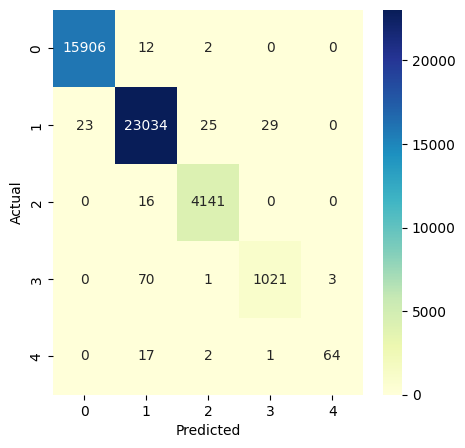

{'Accuracy': 0.9954696057880857}

In [29]:
rf = RandomForestClassifier(random_state=11)
model_evaluation(rf)

Recall:  0.9905109653571348
Precision:  0.99025531362122
Accuracy:  0.9905109653571348


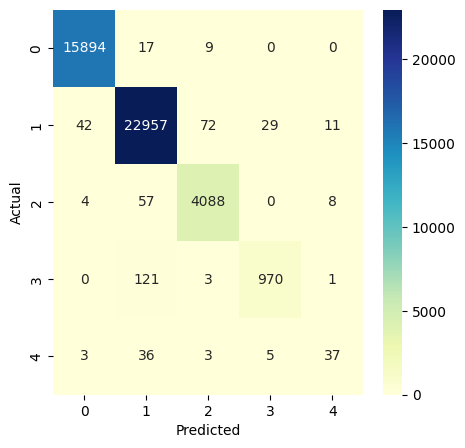

{'Accuracy': 0.9905109653571348}

In [30]:
gb = GradientBoostingClassifier(random_state=11)
model_evaluation(gb)

Recall:  0.9963937160502175
Precision:  0.9963681545293124
Accuracy:  0.9963937160502175


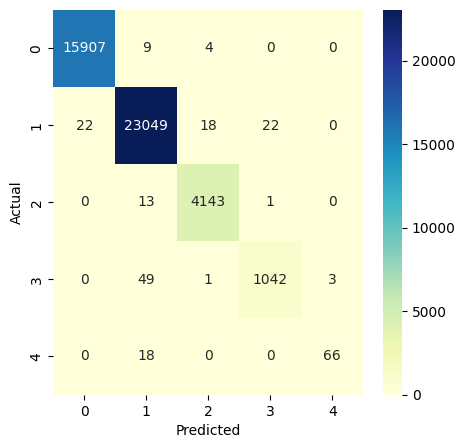

{'Accuracy': 0.9963937160502175}

In [32]:
xgb_classifier = XGBClassifier(random_state=11)
model_evaluation(xgb_classifier)

In [33]:
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_indices = selector.get_support(indices=True)

clf = DecisionTreeClassifier(random_state=11)
sfs = SFS(estimator=clf,
          k_features=20,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)


X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_selected, y_train)

y_predict = dt_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test,y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict,average='weighted')
f1 = f1_score(y_test, y_predict,average='weighted')
precision = precision_score(y_test, y_predict,average='weighted')

print("Selected Features (CFS + SFS):", X_train.columns[selected_feature_indices])
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score", f1)
print("Confusion Matrix:")
print(confusion)


Selected Features (CFS + SFS): Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login'],
      dtype='object')
Accuracy: 0.9708116392814479
Recall: 0.9708116392814479
Precision: 0.9708426739679289
F1-score 0.9699691096626919
Confusion Matrix:
[[15810    79    30     0     1]
 [  151 22834    86    31     9]
 [  753    29  3375     0     0]
 [    2    64     3  1022     4]
 [    0    15    37     1    31]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15920
           1       0.99      0.99      0.99     23111
           2       0.96      0.81      0.88      4157
           3       0.97      0.93      0.95      1095
           4       0.69      0.37      0.48        84

    accuracy                           0.97     44367
   macro avg       0.91      0.82      0.85     44367
weighted avg       0.97      0.97      0.97     44367



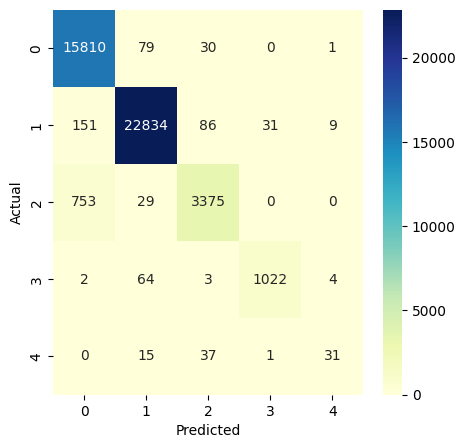

In [34]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [36]:
selector = SelectKBest(f_classif, k=20)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

clf = RandomForestClassifier(n_estimators=10, random_state=42)


sfs = SFS(estimator=clf,
          k_features=20,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

y_pred = rf_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')


print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print("F1-score", f1)
print(confusion)


Accuracy: 0.9711046498523678
Recall: 0.9711046498523678
Precision: 0.971279107964926
Confusion Matrix:
F1-score 0.9702287724162769
[[15810    80    30     0     0]
 [  148 22852    86    23     2]
 [  758    29  3370     0     0]
 [    3    67     1  1021     3]
 [    0    15    37     0    32]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15920
           1       0.99      0.99      0.99     23111
           2       0.96      0.81      0.88      4157
           3       0.98      0.93      0.95      1095
           4       0.86      0.38      0.53        84

    accuracy                           0.97     44367
   macro avg       0.95      0.82      0.86     44367
weighted avg       0.97      0.97      0.97     44367



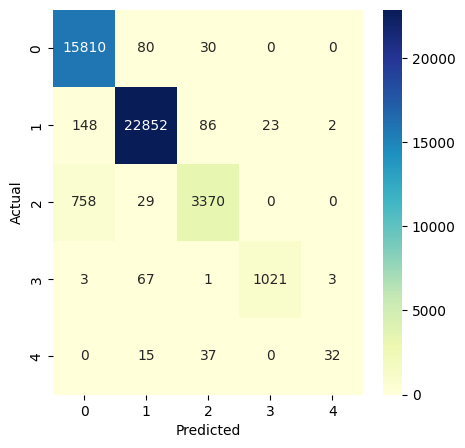

In [37]:
print(classification_report(y_test, y_pred))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [40]:
selector = SelectKBest(f_classif, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

clf = RandomForestClassifier(n_estimators=10, random_state=42)


sfs = SFS(estimator=clf,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

y_pred = rf_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Selected Features (CFS + SFS):", X_train.columns[selected_feature_indices])
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print("F1-score", f1)
print(confusion)


Selected Features (CFS + SFS): Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot'],
      dtype='object')
Accuracy: 0.9700002253927469
Recall: 0.9700002253927469
Precision: 0.970150102401614
Confusion Matrix:
F1-score 0.9690355412429091
[[15810    80    30     0     0]
 [  148 22868    85     7     3]
 [  759    28  3369     1     0]
 [    2   128     3   959     3]
 [    0    17    37     0    30]]


In [42]:
selector = SelectKBest(f_classif, k=30)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

clf = RandomForestClassifier(n_estimators=30, random_state=42)


sfs = SFS(estimator=clf,
          k_features=30,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

y_pred = rf_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Selected Features (CFS + SFS):", X_train.columns[selected_feature_indices])
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print("F1-score", f1)
print(confusion)


Selected Features (CFS + SFS): Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate'],
      dtype='object')
Accuracy: 0.994545495525954
Recall: 0.994545495525954
Precision: 0.9944857184368087
Confusion Matrix:
F1-score 0.9944762309848802
[[15905    11     4     0     0]
 [   31 23019    21    39     1]
 [    3    23  4131     0     0]
 [    0    81     1  1010     3]
 [    0    20     3     1    60]]


In [ ]:
selector = SelectKBest(f_classif, k=20)

X_train_selected = selector.fit_transform(X_train, y_train)


selected_feature_indices = selector.get_support(indices=True)


knn_classifier = KNeighborsClassifier(n_neighbors=5)


sfs = SFS(estimator=knn_classifier,
          k_features=20,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)


selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.fit_transform(X_test_selected)



knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)



y_predict = knn_classifier.predict(X_test_scaled)




accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test, y_predict)
recall = recall_score(y_test, y_predict,average='weighted')
precision = precision_score(y_test, y_predict,average='weighted')
f1 = f1_score(y_test, y_predict,average='weighted')

print("Accuracy:", accuracy)
print("F1-score", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15920
           1       0.99      1.00      1.00     23111
           2       0.99      0.99      0.99      4157
           3       0.96      0.92      0.94      1095
           4       0.94      0.71      0.81        84

    accuracy                           0.99     44367
   macro avg       0.98      0.93      0.95     44367
weighted avg       0.99      0.99      0.99     44367



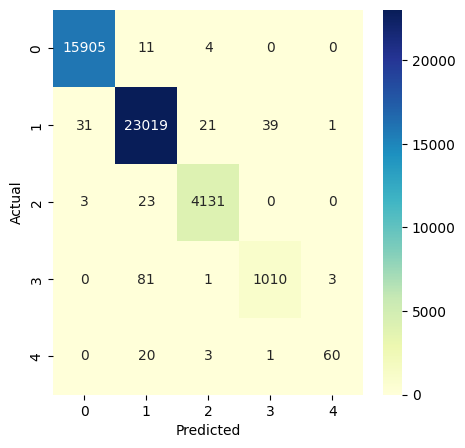

In [46]:
print(classification_report(y_test,y_pred))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [47]:

selector = SelectKBest(f_classif, k=20)

X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=42)

sfs = SFS(estimator=gb_classifier,
          k_features=20,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)


selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb_classifier.fit(X_train_selected, y_train)


y_predict = gb_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test,y_predict)
recall = recall_score(y_test, y_predict,average='weighted')
precision = precision_score(y_test,y_predict,average='weighted')
f1 = f1_score(y_test, y_predict,average='weighted')

print("Selected Features (CFS + SFS):", X_train.columns[selected_feature_indices])
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score", f1)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)


Selected Features (CFS + SFS): Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login'],
      dtype='object')
Accuracy: 0.9253273829648162
Recall: 0.9253273829648162
F1-score 0.9166482763972951
Precision: 0.9286448200795423
Confusion Matrix:
[[15569   347     4     0     0]
 [  222 22800    83     2     4]
 [ 1753   124  2280     0     0]
 [    5   697     2   388     3]
 [   38    29     0     0    17]]


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     15920
           1       0.95      0.99      0.97     23111
           2       0.96      0.55      0.70      4157
           3       0.99      0.35      0.52      1095
           4       0.71      0.20      0.31        84

    accuracy                           0.93     44367
   macro avg       0.90      0.61      0.69     44367
weighted avg       0.93      0.93      0.92     44367



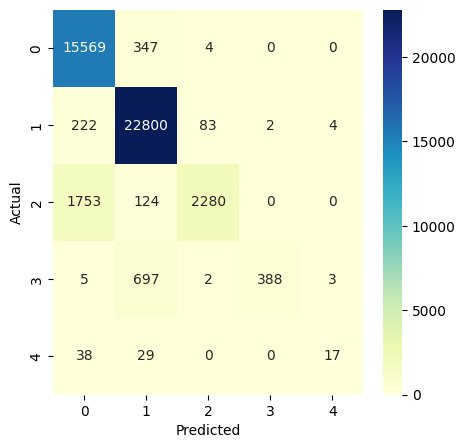

In [48]:
print(classification_report(y_test,y_predict))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predict, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [49]:
selector = SelectKBest(f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_feature_indices = selector.get_support(indices=True)
xgb_classifier = XGBClassifier(n_estimators=10, random_state=42)

sfs = SFS(estimator=xgb_classifier,
          k_features=20,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train_selected, y_train)

selected_feature_indices = list(sfs.k_feature_idx_)

X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

xgb_classifier = XGBClassifier(n_estimators=10, random_state=42)
xgb_classifier.fit(X_train_selected, y_train)

y_pred = xgb_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-score", f1)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9672504338810377
Recall: 0.9672504338810377
F1-score 0.9659244101241857
Precision: 0.9675398103079969
Confusion Matrix:
[[15822    80    18     0     0]
 [  157 22848    90    14     2]
 [  892    28  3237     0     0]
 [    2   101     3   986     3]
 [    0    26    37     0    21]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15920
           1       0.99      0.99      0.99     23111
           2       0.96      0.78      0.86      4157
           3       0.99      0.90      0.94      1095
           4       0.81      0.25      0.38        84

    accuracy                           0.97     44367
   macro avg       0.94      0.78      0.83     44367
weighted avg       0.97      0.97      0.97     44367



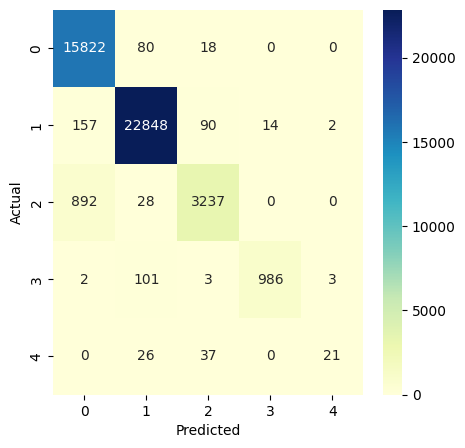

In [50]:
print(classification_report(y_test,y_pred))
cross = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()